# 📦 Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 📥 Load dataset

In [2]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [5]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [6]:
df.shape

(614, 13)

In [7]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.000000,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.000000,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,592.000000,146.412162,85.587325,9.000000,100.000000,128.000000,168.000000,700.000000
Loan_Amount_Term,600.000000,342.000000,65.120410,12.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,564.000000,0.842199,0.364878,0.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# Data Cleaning - Fill Missing Values

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [11]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents'] = df['Dependents'].astype(int)

In [12]:
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


# Data Visualization

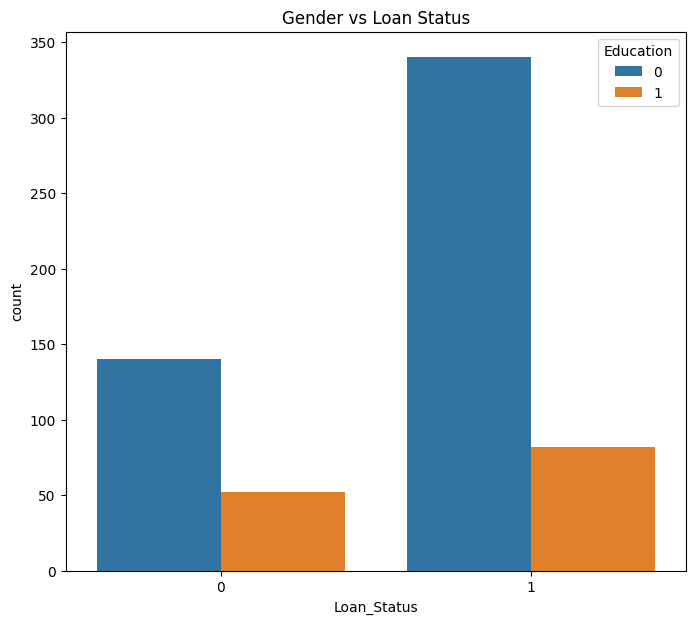

In [32]:
plt.figure(figsize=(8,7))
sns.countplot(x='Loan_Status', hue='Education', data=df)
plt.title('Gender vs Loan Status')
plt.show()

**Insight**: Graduates are more likely to get loan approval than non-graduates, indicating that education might influence loan decisions.

<Figure size 1200x600 with 0 Axes>

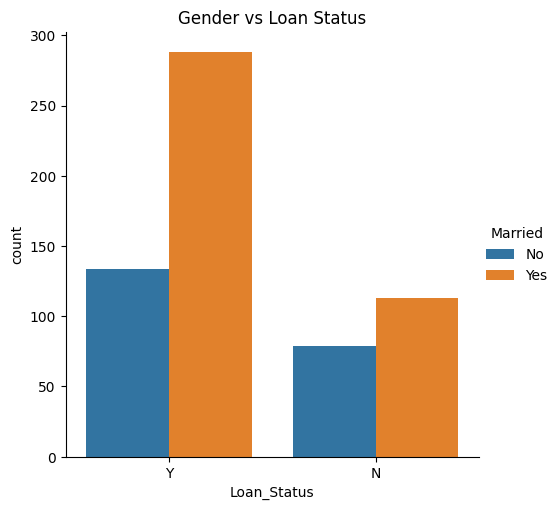

In [14]:
plt.figure(figsize=(12,6))
sns.catplot(x='Loan_Status', hue='Married', kind='count', data=df)
plt.title('Gender vs Loan Status')
plt.show()

**Insight**: Married applicants tend to have a slightly higher loan approval rate, possibly due to perceived financial stability.

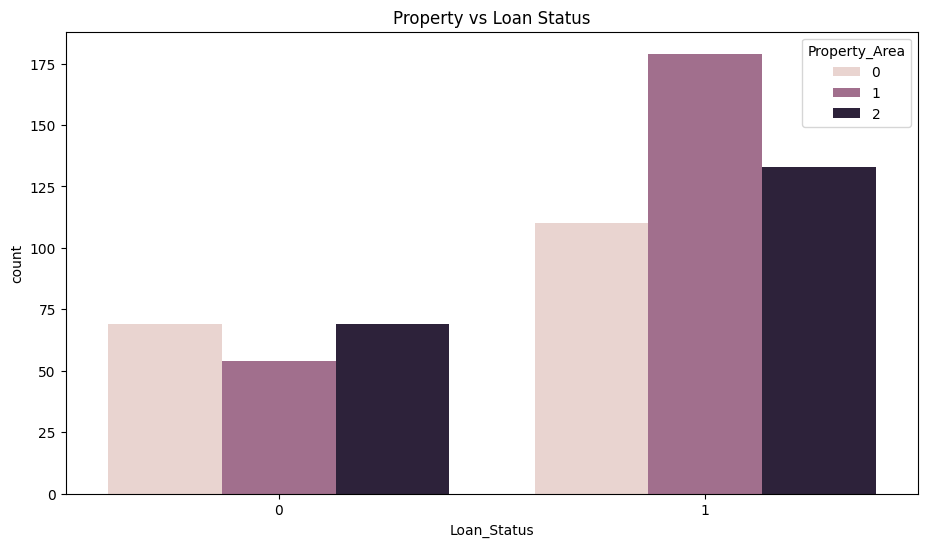

In [34]:
plt.figure(figsize=(11,6))
sns.countplot(x='Loan_Status', hue='Property_Area', data=df)
plt.title('Property vs Loan Status')
plt.show()

**Insight**: Urban and semi-urban applicants may have a higher approval rate, possibly due to more stable incomes or better documentation.

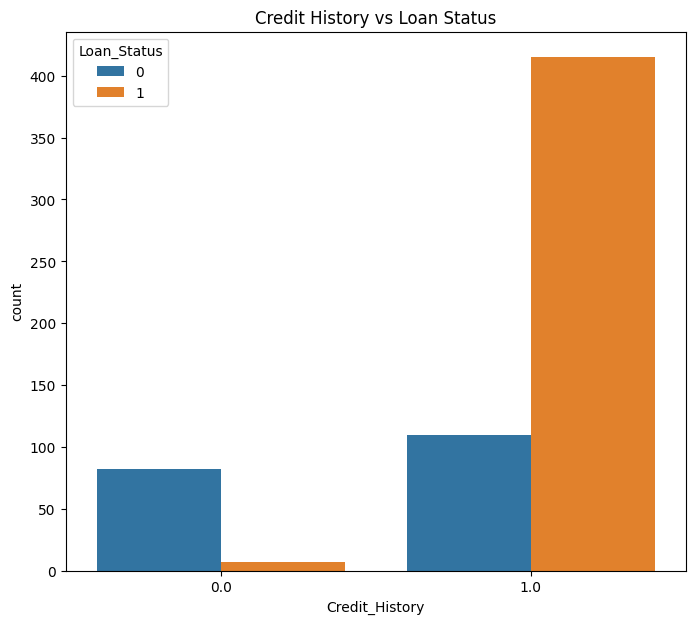

In [35]:
plt.figure(figsize=(8,7))
sns.countplot(hue='Loan_Status', x='Credit_History', data=df)
plt.title('Credit History vs Loan Status')
plt.show()

**Insight**: Applicants with a credit history of 1 (good history) are much more likely to get approved. This is the strongest single predictor.

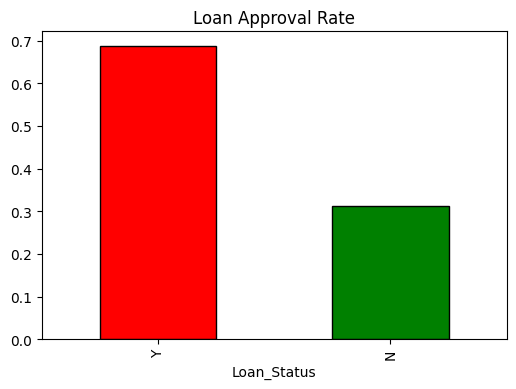

In [17]:
plt.figure(figsize=(6, 4))
sns.barplot
df['Loan_Status'].value_counts(normalize=True).plot(
    kind='bar',
    color=['red', 'green'],
    edgecolor='black'
)
plt.title('Loan Approval Rate')
plt.show()

**Insight:**
If ~69% are approved and ~31% are rejected, it shows lenders are approving a majority of loans — but not all.

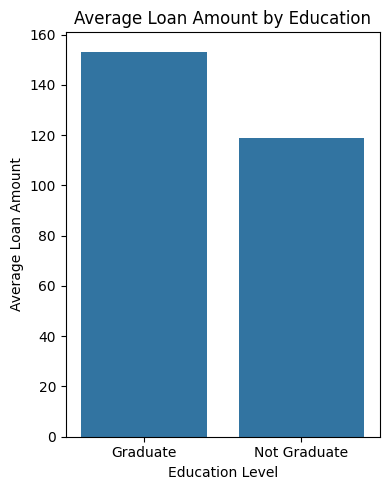

In [18]:
plt.figure(figsize=(4, 5))
sns.barplot(x=df['Education'].unique(),
            y=df.groupby('Education')['LoanAmount'].mean().values)

plt.title('Average Loan Amount by Education')
plt.xlabel('Education Level')
plt.ylabel('Average Loan Amount')
plt.tight_layout()
plt.show()

**Insight**: Self-employed or less educated individuals may request slightly lower or riskier loan amounts on average.

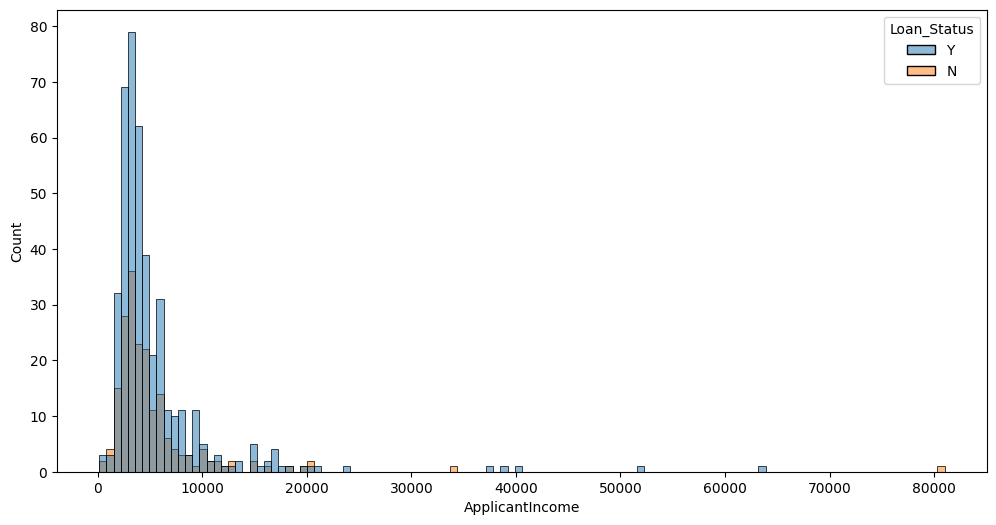

In [19]:
plt.figure(figsize=(12,6))
sns.histplot(x='ApplicantIncome', hue='Loan_Status', data=df)
plt.show()

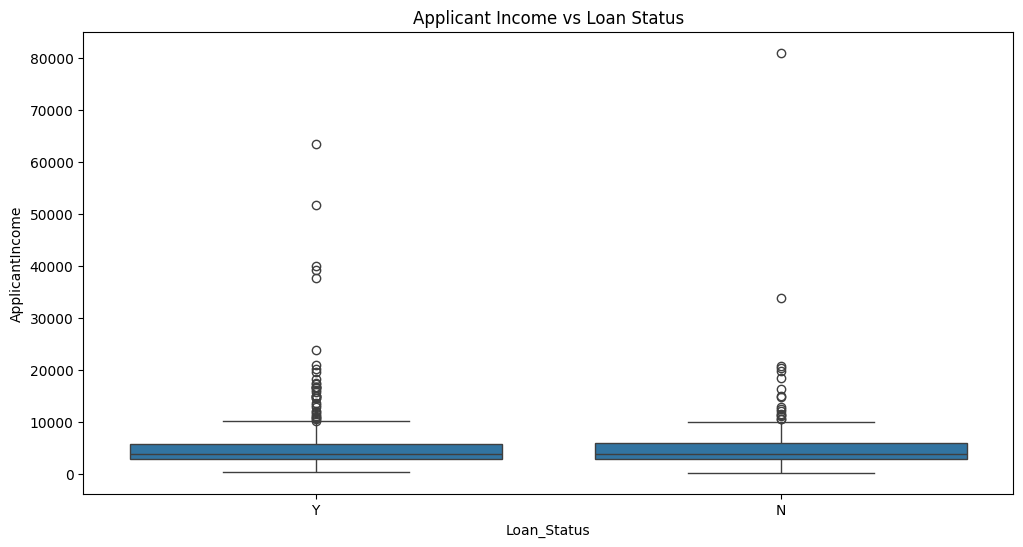

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title('Applicant Income vs Loan Status')
plt.show()

# Label Encoding

In [21]:
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cols:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

# 🤖Training & Testing Data (Feature Selection)

In [22]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [24]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.7886178861788617


In [26]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[18 25]
 [ 1 79]]


In [27]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

